In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the datasets
train_df = pd.read_csv("C:/Users/KEERTI/Downloads/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv")
test_df = pd.read_csv("C:/Users/KEERTI/Downloads/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv")

In [3]:
# Display shape and head to understand the data
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())

Train shape: (1296675, 23)
Test shape: (555719, 23)
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1   

In [4]:
# Combine datasets for consistent encoding
combined_df = pd.concat([train_df, test_df], axis=0)

In [5]:
print("Columns in combined_df:", combined_df.columns.tolist())

Columns in combined_df: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [6]:

# Encode categorical columns
cat_cols = ['category', 'gender', 'job']
encoder = LabelEncoder()
for col in cat_cols:
    combined_df[col] = encoder.fit_transform(combined_df[col].astype(str))

In [7]:

# Split back into train and test
train_rows = train_df.shape[0]
train_df_cleaned = combined_df.iloc[:train_rows].copy()
test_df_cleaned = combined_df.iloc[train_rows:].copy()

# Define features and target
features = ['category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'job']
target = 'is_fraud'

X_train = train_df_cleaned[features]
y_train = train_df_cleaned[target]
X_test = test_df_cleaned[features]
y_test = test_df_cleaned[target]


In [ ]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

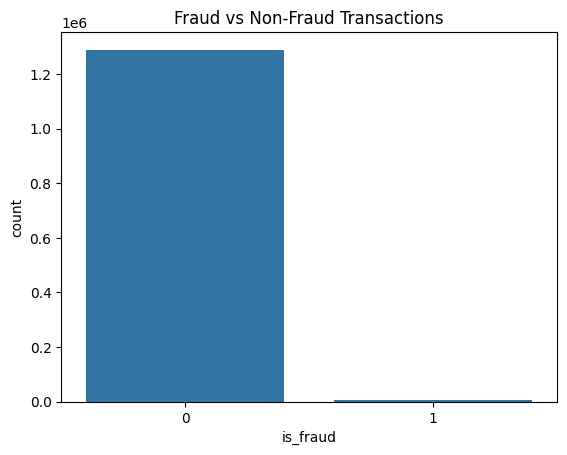

In [ ]:
sns.countplot(x='is_fraud', data=train_df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()